# Report

## Question-1

We have predicted the values from test set datapoints using regularised least square kernel regression model with the RBF kernels. During training process, the kernel size will be 400*401.

We will get coeffiecient vector of size 401*1.

We'll further make test kernel using the combinations of testing data points and training data points of size 200*401.

We'll use this testing kernel and calculated coefficient vector to predict the Y values in test set.

*Observations* - As we'll increase the value of sigma, the RMSE will also increase but after a certain point it'll start decreasing. Similarily, when we increase the value of lambda, again the RMSE start increasing. But we can not take a very small value of both as well as the tradeoff occurs. (See figures in section Question-1)

## Question-2

We have used the gradient descent method in case of both regularised polynomial regression for M = 1,2 and 5 and regularised kernel regression. I have created a separate function to calculate the gradient. I have initialised the coeffiecients from 1 and keep on updating it by moving in the opposite direction of the gradient.

We further used these coefficients to predict Y values for test data points.

We have plotted the gradient norm vs number of iterations curve for each case as well.

To make the graph more readable, we have left first 1500 values of gradient norms because initially the gradient is decreasing very rapidly in initial few iterations only. thus, graph was becoming as a straight line parallel to Y axis and the a line parallel to x-axis. (see figures in section Question-2 for more details.)

## Question-3

We have used the stochastic gradient descent method in case of both regularised polynomial regression for M = 1,2 and 5 and regularised kernel regression. I have created a separate function to calculate the stochastic gradient. The function is taking 16 datapoints randomly. I have initialised the coeffiecients from 1 and keep on updating it by moving in the opposite direction of the gradient.

We further used these coefficients to predict Y values for test data points.

We have plotted the stochastic gradient norm vs number of iterations curve for each case as well.

To make the graph more readable, we have left first 1500 values of gradient norms because initially the gradient is decreasing very rapidly in initial few iterations only. thus, graph was becoming as a straight line parallel to Y axis and the a line parallel to x-axis. (see figures in section Question-3 for more details.)

## Question-4

We have plotted a bar chart to compare the RMSE values between Normal least square regularised polynomial regression (RPR), regularised least square kernel regression(RKR), RPR and RKR using gradient descent and RPR and RKR using stochastic gradient descent. We have also used 3 different orders M = 1,2 and 5

Eta value used was 0.00002 and tolerance is 2.0. That is why least squared polynomial regression model is giving better result than GD and SGD as the GD and SGD models are not tuned as per their hyper parameter. (see figure in section Question-4 for more details)

## Question-5

We were asked to study the behaviour of eta regarding the convergence. For this I have taken 3 different values of eta = 0.00002, 0.0002 and 0.002 and applied it on regularised polynomial regression with M = 1,2,5 and calculated the RMSE and number of iteration required to converge till the actual solution.
In case of smaller step length(eg eta = 0.00002), it takes a long time to converge to the actual solution. As we keep increasing the value of step length, number of iteration required to reach the actual solution decreases.(for eta = 0.0002)

*Observations* - In case if we further increase the step size value(for eta = 0.002), there is a possibilty that function would miss the minima region and values would overshoot. Similar thing has happened in Question-5 in case of eta=0.002. (check section Question-5 and resultant values for more detail)

# Creating Datasets

In [2]:
import numpy as np
import math

In [3]:
##### generating the uniformly distributed X values for bivariate case

def generate_bivariate_X(N):
  X = []
  for i in range(N):
    X = np.random.uniform(size = N)
  return X

In [4]:
##### generating the Y values for bivariate case based on the given X1 and X2 values

def generate_bivariate_Y(X1, X2, N):
  PI = math.pi
  Exp = 2 * PI * ((X1**2 + X2**2) ** 0.5)
  Epsilon = np.random.normal(0, 0.25, size = N)
  # print(Epsilon)
  Y = np.sin(Exp) + Epsilon
  return Y

In [5]:
##### Making the bivariate dataset for given X1, X2 and Y

def create_XY_bivariate_set(X1, X2, Y):
  result = np.array(list(zip(X1, X2, Y)))
  # print(result)
  return result

In [6]:
x1 = np.array(sorted(generate_bivariate_X(400)))
x2 = np.array(sorted(generate_bivariate_X(400)))
y = generate_bivariate_Y(x1, x2, 400)

training_set_bivariate = create_XY_bivariate_set(x1, x2, y)
training_set_bivariate.shape

(400, 3)

In [7]:
x1 = np.array(sorted(generate_bivariate_X(200)))
x2 = np.array(sorted(generate_bivariate_X(200)))
y = generate_bivariate_Y(x1, x2, 200)

testing_set_bivariate = create_XY_bivariate_set(x1, x2, y)
testing_set_bivariate.shape

(200, 3)

In [8]:
training_set_bivariate[0:5]

array([[ 0.00034608,  0.00037812,  0.08668738],
       [ 0.00159676,  0.00105856,  0.21046033],
       [ 0.00219869,  0.00269573, -0.28029375],
       [ 0.00425768,  0.00422625, -0.19637312],
       [ 0.00593377,  0.0125423 , -0.17338742]])

In [9]:
testing_set_bivariate[0:5]

array([[ 2.91295323e-04,  9.30708094e-04, -1.17278732e-01],
       [ 1.12250314e-02,  7.09644464e-03, -7.01682168e-02],
       [ 2.43722817e-02,  1.16007609e-02, -8.98500029e-02],
       [ 2.63971238e-02,  1.26979676e-02,  5.20807800e-01],
       [ 3.86995438e-02,  1.39721168e-02,  3.21491345e-01]])

In [10]:
len(testing_set_bivariate)

200

# Question-1

Obtain the prediction on testing set and compute the RMSE for regularized
least squares kernel regression model with the RBF kernel K(x,y) = exp(- (||x-
y|| 2 /σ). using the direct method. Study the behavior of the kernel parameter σ
and regularization λ on prediction in terms of RMSE.

In [11]:
def calculate_kernel_block(X1, Y1, X2, Y2, sigma):
  value = math.exp((-1* ((X1-X2)**2 + (Y1-Y2)**2)) / sigma)
  return value

In [12]:
def construct_kernel(row_X, col_X, sigma):
  kernel = np.zeros((len(row_X), len(col_X)+1))
  kernel[:,-1] = 1
  for i in range(len(row_X)):
    for j in range(len(col_X)):
      kernel[i][j] = calculate_kernel_block(row_X[i][0], row_X[i][1], col_X[j][0], col_X[j][1], sigma)
  return kernel

In [13]:
def calculate_U(kernel, Y, lamb):
  result = np.linalg.inv((kernel.T @ kernel) + lamb * np.identity(int(len(kernel[0])))) @ kernel.T @ Y
  return result

In [14]:
###### Function to calculate the RMSE based on actual and estimated Y values

def calculate_RMSE(Y, Y_real):
  error = np.subtract(Y, Y_real)
  squared_error = np.square(error)
  total_squared_error = squared_error.sum()     #### to sum all the values in each row
  total_mean_squared_error = total_squared_error/len(Y)
  total_root_mean_squared_error = np.sqrt(total_mean_squared_error)
  return total_mean_squared_error

In [15]:
train_X = training_set_bivariate[:, 0:2]
train_Y = training_set_bivariate[:, -1]
test_X = testing_set_bivariate[:, 0:2]
test_Y = testing_set_bivariate[:, -1]

In [16]:
sigma = 5

train_kernel = construct_kernel(train_X, train_X, sigma)

In [17]:
train_kernel.shape

(400, 401)

In [18]:
lamb = 0.001

U = calculate_U(train_kernel, train_Y, lamb)

In [19]:
U.shape

(401,)

In [20]:
train_Y_est = train_kernel @ U
train_RMSE = calculate_RMSE(train_Y_est, train_Y)
train_RMSE

0.2857097461006154

In [21]:
test_kernel = construct_kernel(test_X, train_X, sigma)

In [22]:
test_kernel.shape

(200, 401)

In [23]:
test_Y_est = test_kernel @ U

In [24]:
test_Y_est.shape

(200,)

In [25]:
print(test_Y_est)

[ 1.10236187e+00  1.05739684e+00  1.00001966e+00  9.91460192e-01
  9.33769451e-01  9.24585204e-01  8.24499338e-01  8.17247932e-01
  7.84489253e-01  7.73783939e-01  7.22867261e-01  7.07957359e-01
  7.17630143e-01  6.80801517e-01  6.83699890e-01  6.80245961e-01
  6.56662580e-01  6.09374181e-01  5.91335081e-01  5.90338480e-01
  5.46449684e-01  5.39337327e-01  4.95102229e-01  4.94878982e-01
  4.92545585e-01  4.68582628e-01  4.68388777e-01  4.63800480e-01
  3.99685402e-01  3.91917473e-01  3.89003925e-01  3.00504541e-01
  2.82220532e-01  2.90291073e-01  2.68881085e-01  2.45852362e-01
  2.22253738e-01  1.77057749e-01  1.51296927e-01  1.53406724e-01
  1.14554736e-01  8.88692712e-02  7.33289860e-02  7.33332911e-02
  7.31983487e-02  2.15910316e-02 -6.51734760e-03 -2.23396075e-02
 -2.40680080e-02  2.25146425e-03 -1.99541219e-02 -4.45257749e-02
 -1.78652917e-02  2.49139371e-02  3.21297710e-02 -5.15141017e-03
 -6.87817361e-03 -1.07827845e-02 -1.75684170e-02  1.70183483e-03
 -4.96931998e-02 -5.02243

In [26]:
test_RMSE = calculate_RMSE(test_Y_est, test_Y)

In [27]:
test_RMSE_RKR_Q1 = test_RMSE
test_RMSE_RKR_Q1

0.41077051829435407

### Behaviour of sigma and lambda on predictions in terms of RMSE

In [28]:
sigma_list = list(range(1,11,1))
lambda_list = [0.1, 0.05, 0.01, 0.005, 0.001]

print('comparison of Behaviour of sigma and lambda on predictions in terms of RMSE=======')

RMSE_sigma = []
RMSE_lambda = []

for sigma in sigma_list:
  lamb = 0.001
  train_kernel = construct_kernel(train_X, train_X, sigma)
  test_kernel = construct_kernel(test_X, train_X, sigma)
  
  U = calculate_U(train_kernel, train_Y, lamb)
  train_Y_est = train_kernel @ U
  train_RMSE = calculate_RMSE(train_Y_est, train_Y)
  test_Y_est = test_kernel @ U
  test_RMSE = calculate_RMSE(test_Y_est, test_Y)
  RMSE_sigma.append(test_RMSE)
  # print()
  # print('Train RMSE value in case of sigma value {} and lambda value {} is : {}'.format(sigma, lamb, train_RMSE))
  # print('Test RMSE value in case of sigma value {} and lambda value {} is : {}'.format(sigma, lamb, test_RMSE))
  # print('==========================================================================================================')

for lamb in lambda_list:
  sigma = 1
  train_kernel = construct_kernel(train_X, train_X, sigma)
  test_kernel = construct_kernel(test_X, train_X, sigma)
  
  U = calculate_U(train_kernel, train_Y, lamb)
  train_Y_est = train_kernel @ U
  train_RMSE = calculate_RMSE(train_Y_est, train_Y)
  test_Y_est = test_kernel @ U
  test_RMSE = calculate_RMSE(test_Y_est, test_Y)
  RMSE_lambda.append(test_RMSE)


comparison of Behaviour of sigma and lambda on predictions in terms of RMSE=======


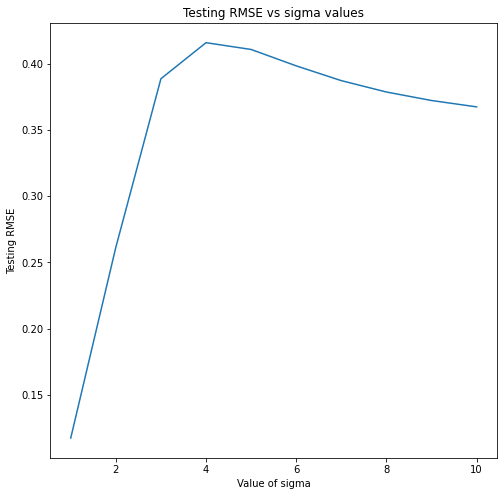

In [29]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize = (8,8))
plt.plot(sigma_list, RMSE_sigma)
plt.xlabel('Value of sigma')
plt.ylabel('Testing RMSE')
plt.title('Testing RMSE vs sigma values')
plt.show()
plt.close(fig1)

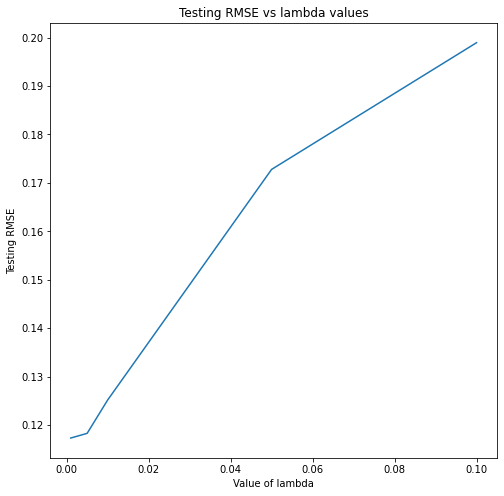

In [30]:
fig1 = plt.figure(figsize = (8,8))
plt.plot(lambda_list, RMSE_lambda)
plt.xlabel('Value of lambda')
plt.ylabel('Testing RMSE')
plt.title('Testing RMSE vs lambda values')
plt.show()
plt.close(fig1)

# Question-2

Obtain the prediction on testing set and compute the RMSE for regularized
polynomial regression models for order M =1,2 , 5 and regularized least squares
kernel regression model using the gradient descent method.

### first implementing Regularised polynomial regression model for order M=1,2,5 to calculate RMSE on testing data-points using gradient-descent method

In [31]:
train_X1, train_X2 = zip(*train_X)
train_X1 = np.array(train_X1)
train_X2 = np.array(train_X2)

In [32]:
test_X1, test_X2 = zip(*test_X)
test_X1 = np.array(test_X1)
test_X2 = np.array(test_X2)

In [33]:
def compute_gradient(lamb, U, A, Y):
  grad = (lamb*U) - (A.T @ (Y - (A@U)))
  return grad

In [34]:
def generate_single_col_vector(x, y, M):
  v = []
  for j in range(M+1):
    x_pow = j
    y_pow = 0
    while x_pow >= 0:
      v.append((x**x_pow) * (y**y_pow))
      x_pow = x_pow-1
      y_pow = y_pow+1
  return v

In [35]:
def generate_bivariate_x_matrix(X1, X2, M):
  rows = int((M+1)*(M+2)/2)
  x_matrix = np.zeros((len(X1), rows))
  for j in range(len(X1)):
    single_col_vector = generate_single_col_vector(X1[j], X2[j], M)
    x_matrix[j,:] = single_col_vector
  return x_matrix

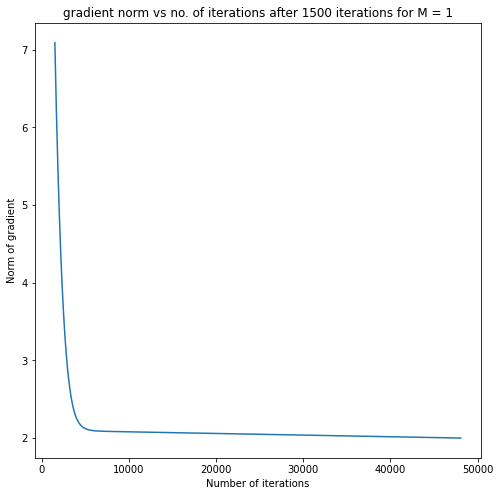

Testing RMSE for M=1 is : 0.6988961589749403
Total number of iterations performed to get the values less then the tolerance are : 48055


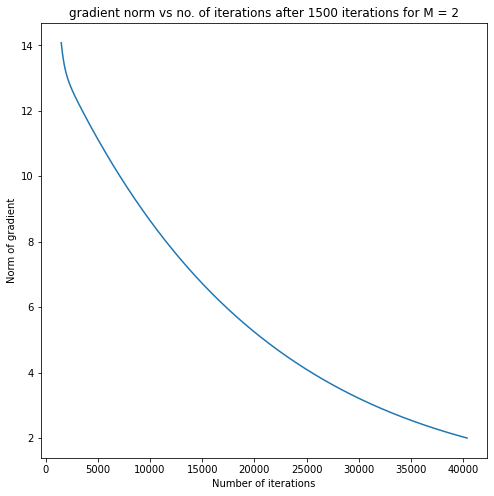

Testing RMSE for M=2 is : 0.3949235200352556
Total number of iterations performed to get the values less then the tolerance are : 40376


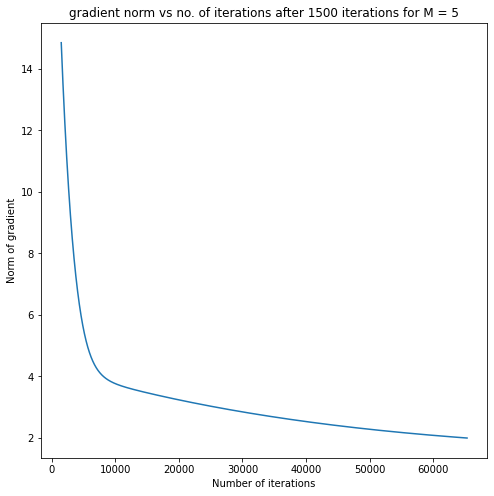

Testing RMSE for M=5 is : 0.3362408908496466
Total number of iterations performed to get the values less then the tolerance are : 65320


In [70]:


M_list = np.array([1,2,5])
values_in_eq = (M_list+1) * (M_list+2)/2
RMSE_RPR = []

lamb = math.exp(-18)
eta = 0.00002
tolerance = 2.0
### 0.05

for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  weight_coeff = np.array([1]*len(x_matrix_bivariate[0]))
  
  counter = 1
  G_norm = []

  G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

  while np.linalg.norm(G) > tolerance:
    weight_coeff = weight_coeff - eta * G
    G_norm.append(np.linalg.norm(G))
    G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

    # print('Iteration no : '+str(counter))
    counter = counter+1
    # print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
    # print('==============================================================')

  test_Y_est_RPR = x_matrix_bivariate_test @ weight_coeff
  RMSE_current_M = calculate_RMSE(test_Y_est_RPR, test_Y)

  fig2 = plt.figure(figsize = (8,8))
  x_axis = list(range(counter-1))
  plt.plot(x_axis[1500:], G_norm[1500:])
  plt.xlabel('Number of iterations')
  plt.ylabel('Norm of gradient')
  plt.title('gradient norm vs no. of iterations after 1500 iterations for M = '+str(M))
  plt.show()
  plt.close(fig2)

  print('Testing RMSE for M={} is : {}'.format(M, RMSE_current_M))
  print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
  print('============================================================================')

  RMSE_RPR.append(RMSE_current_M)

In [37]:
RMSE_RPR

[0.6988961589749403, 0.3949235200352556, 0.3362408908496466]

### Now implementing Regularised least square Kernel regression model using gradient descent to calculate RMSE on testing data-points 

In [38]:
##### I am using the functions defined in question-1 to build the training and testing kernels

sigma = 1

train_kernel = construct_kernel(train_X, train_X, sigma)
test_kernel = construct_kernel(test_X, train_X, sigma)

In [ ]:
coeff = np.array([1]*len(train_kernel[0]))

lamb = math.exp(-18)
eta = 0.00002
tolerance = 2.0
### 0.05
counter = 1
G_norm = []
G = compute_gradient(lamb, coeff, train_kernel, train_Y)

while np.linalg.norm(G) > tolerance:
  coeff = coeff - eta * G
  G_norm.append(np.linalg.norm(G))
  G = compute_gradient(lamb, coeff, train_kernel, train_Y)
  
  print('Iteration no : '+str(counter))
  counter = counter+1
  print(G.shape)
  print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
  print('==============================================================')


In [40]:
test_Y_est_Q2 = test_kernel @ coeff
test_RMSE_RKR_Q2 = calculate_RMSE(test_Y_est_Q2, test_Y)
print('Testing RMSE in case of regularized kernel regression is : {}'.format(test_RMSE_RKR_Q2))
print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
print('============================================================================')

Testing RMSE in case of regularized kernel regression is : 0.24981980241387333
Total number of iterations performed to get the values less then the tolerance are : 37595


In [41]:
print(test_Y_est_Q2)

[ 0.98886352  0.97415667  0.95735372  0.95430514  0.93968982  0.92905828
  0.88812318  0.88572217  0.87585754  0.87181263  0.85403544  0.83888763
  0.82456049  0.8125957   0.80874911  0.80387845  0.7959027   0.77425223
  0.76133723  0.76019525  0.7302087   0.72536218  0.70504479  0.70340622
  0.67607002  0.66014159  0.65801794  0.6548083   0.63134912  0.62476498
  0.62118572  0.58703334  0.57286485  0.54093394  0.51679997  0.50033684
  0.49064058  0.46506181  0.45234553  0.4388773   0.4207154   0.40767846
  0.40021627  0.3939544   0.39255072  0.35484706  0.33972076  0.33024332
  0.32789781  0.29536594  0.27596814  0.26501957  0.226382    0.18795678
  0.18127655  0.16416668  0.15334597  0.13747023  0.12231853  0.10319754
  0.07668341  0.0522996   0.04588322  0.04205093  0.02398863  0.00960589
 -0.02697906 -0.03526087 -0.04421372 -0.06493985 -0.08650776 -0.09523434
 -0.10822442 -0.12912357 -0.15999602 -0.17026613 -0.17472144 -0.18355527
 -0.18857654 -0.20932671 -0.22786684 -0.27295659 -0

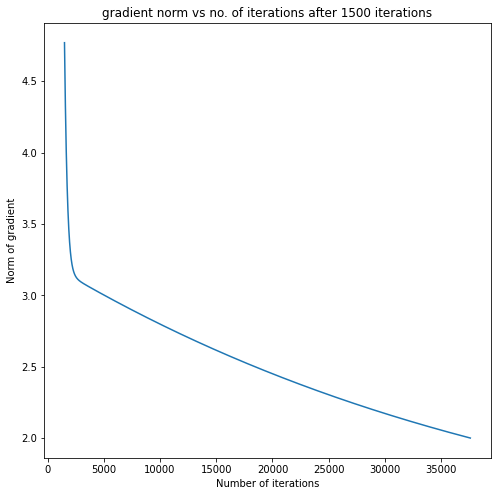

In [42]:
###### plotting the gradient norm vs number of itertaions curve

fig1 = plt.figure(figsize = (8,8))
x_axis = list(range(counter-1))
plt.plot(x_axis[1500:], G_norm[1500:])
plt.xlabel('Number of iterations')
plt.ylabel('Norm of gradient')
plt.title('gradient norm vs no. of iterations after 1500 iterations')
plt.show()

In [43]:
plt.close(fig1)

# Question-3

Obtain the prediction on testing set and compute the RMSE for regularized
polynomial regression models for order M =1,2 , 5 and regularized least squares
kernel regression model using the k-mini batch stochastic gradient descent
method.

In [44]:
import random

In [45]:
def compute_gradient_K_batch(lamb, U, A, Y):
  P = random.sample(range(0, 400), 16)
  grad = (lamb*U) - (A[P].T @ (Y[P] - (A[P] @ U)))
  return grad

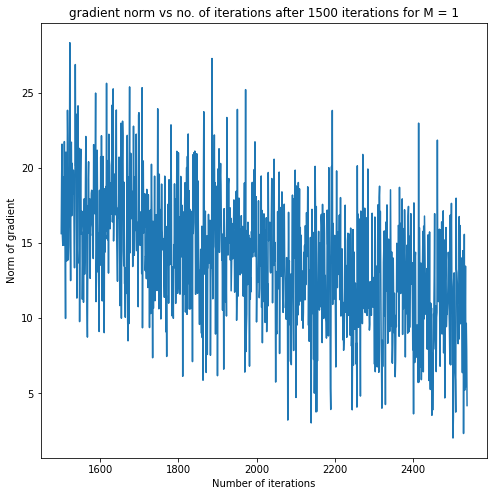

Testing RMSE for M=1 is : 0.9719535459359031
Total number of iterations performed to get the values less then the tolerance are : 2540


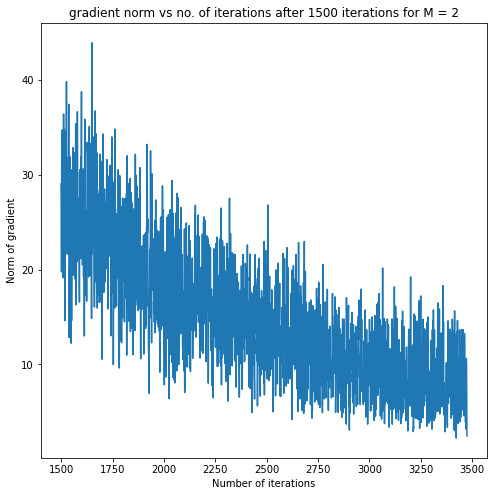

Testing RMSE for M=2 is : 0.8029138557465921
Total number of iterations performed to get the values less then the tolerance are : 3475


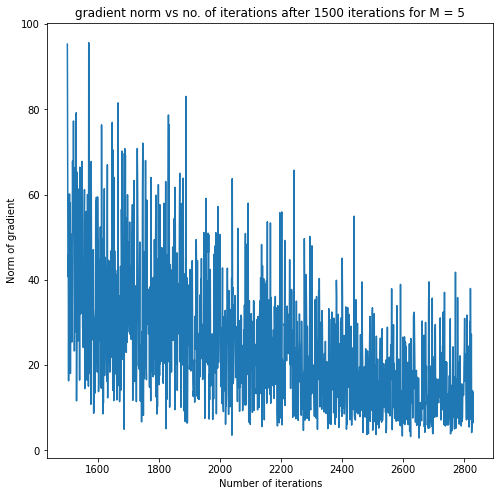

Testing RMSE for M=5 is : 0.8934166277453599
Total number of iterations performed to get the values less then the tolerance are : 2830


In [46]:
M_list = np.array([1,2,5])
values_in_eq = (M_list+1) * (M_list+2)/2
RMSE_RPR_K_batch = []

lamb = math.exp(-18)
eta = 0.00002
tolerance = 2.0
### 0.05


for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  weight_coeff = np.array([1]*len(x_matrix_bivariate[0]))
  
  counter = 1
  G_norm = []

  G = compute_gradient_K_batch(lamb, weight_coeff, x_matrix_bivariate, train_Y)

  while np.linalg.norm(G) > tolerance:
    weight_coeff = weight_coeff - eta * G
    G_norm.append(np.linalg.norm(G))
    G = compute_gradient_K_batch(lamb, weight_coeff, x_matrix_bivariate, train_Y)

    # print('Iteration no : '+str(counter))
    counter = counter+1
    # print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
    # print('==============================================================')

  test_Y_est_RPR_K_batch = x_matrix_bivariate_test @ weight_coeff
  RMSE_current_M = calculate_RMSE(test_Y_est_RPR_K_batch, test_Y)

  fig1 = plt.figure(figsize = (8,8))
  x_axis = list(range(counter-1))
  plt.plot(x_axis[1500:], G_norm[1500:])
  plt.xlabel('Number of iterations')
  plt.ylabel('Norm of gradient')
  plt.title('gradient norm vs no. of iterations after 1500 iterations for M = '+str(M))
  plt.show()
  plt.close(fig1)

  print('Testing RMSE for M={} is : {}'.format(M, RMSE_current_M))
  print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
  print('============================================================================')

  RMSE_RPR_K_batch.append(RMSE_current_M)

In [ ]:
coeff = np.array([1]*len(train_kernel[0]))

lamb = math.exp(-18)
eta = 0.00002
tolerance = 2.0
### 0.05
counter = 1
G_norm = []
G = compute_gradient_K_batch(lamb, coeff, train_kernel, train_Y)

while np.linalg.norm(G) > tolerance:
  coeff = coeff - eta * G
  G_norm.append(np.linalg.norm(G))
  G = compute_gradient_K_batch(lamb, coeff, train_kernel, train_Y)
  
  print('Iteration no : '+str(counter))
  counter = counter+1
  print(G.shape)
  print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
  print('==============================================================')


In [48]:
test_Y_est_Q3 = test_kernel @ coeff
test_RMSE_RKR_Q3 = calculate_RMSE(test_Y_est_Q3, test_Y)
print('Testing RMSE in case of regularized kernel regression is : {}'.format(test_RMSE_RKR_Q3))
print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
print('============================================================================')

Testing RMSE in case of regularized kernel regression is : 0.35803339077543156
Total number of iterations performed to get the values less then the tolerance are : 3991


In [49]:
print(test_Y_est_Q3)

[ 1.98913325e+00  1.93145328e+00  1.86952774e+00  1.85860549e+00
  1.80846458e+00  1.77156771e+00  1.64083770e+00  1.63358606e+00
  1.60435553e+00  1.59236327e+00  1.54095371e+00  1.49627778e+00
  1.45370038e+00  1.42126228e+00  1.41015390e+00  1.39656539e+00
  1.37540436e+00  1.31817261e+00  1.28412366e+00  1.28110203e+00
  1.20402336e+00  1.19178252e+00  1.14189239e+00  1.13771501e+00
  1.06909976e+00  1.03098386e+00  1.02580668e+00  1.01818840e+00
  9.64594907e-01  9.49221779e-01  9.40827140e-01  8.65292423e-01
  8.33410723e-01  7.59887872e-01  7.06956551e-01  6.71713053e-01
  6.51621966e-01  5.98395331e-01  5.72437104e-01  5.43552737e-01
  5.07196468e-01  4.81243121e-01  4.66532627e-01  4.53475343e-01
  4.50563936e-01  3.75915711e-01  3.46834138e-01  3.28634009e-01
  3.24011605e-01  2.57842868e-01  2.20946571e-01  2.00874456e-01
  1.25771435e-01  5.30462252e-02  4.06924911e-02  1.02103276e-02
 -9.33899786e-03 -3.77809826e-02 -6.46489334e-02 -9.85042693e-02
 -1.44146734e-01 -1.86019

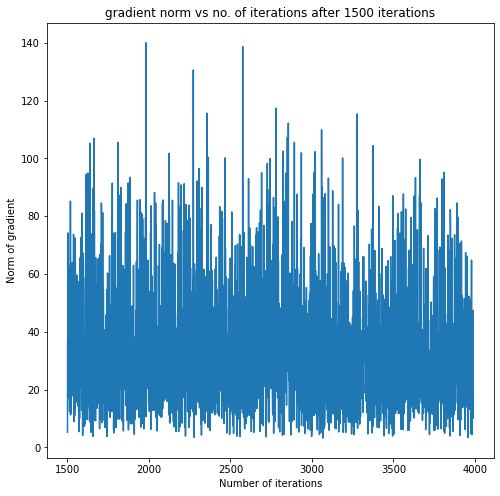

In [50]:
###### plotting the gradient norm vs number of itertaions curve

fig1 = plt.figure(figsize = (8,8))
x_axis = list(range(counter-1))
plt.plot(x_axis[1500:], G_norm[1500:])
plt.xlabel('Number of iterations')
plt.ylabel('Norm of gradient')
plt.title('gradient norm vs no. of iterations after 1500 iterations')
plt.show()

# Question-4

Compare the obtained solution by the gradient and stochastic gradient
algorithm with the solution obtained by the direct method (solving the normal
equation) in each case.

In [51]:
M_list = np.array([1,2,5])
lamb = 0.001
values_in_eq = (M_list+1) * (M_list+2)/2
RMSE_RPR_normal = []

for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  w_optimal_bivariate = np.linalg.inv((x_matrix_bivariate.T @ x_matrix_bivariate) + lamb * np.identity(int(val))) @ x_matrix_bivariate.T @ train_Y
  # # w_matrix_bivariate.append(w_optimal_bivariate)
  # y_est_bivariate = w_optimal_bivariate @ (x_matrix_bivariate.T)
  # RMSE_bivariate = calculate_RMSE()
  print('For M value : '+str(M))
  # print('Training RMSE : '+str(RMSE_bivariate))

  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  y_est_bivariate_test = w_optimal_bivariate @ (x_matrix_bivariate_test.T)
  RMSE_bivariate_test = calculate_RMSE(y_est_bivariate_test, test_Y)
  print('Testing RMSE : '+str(RMSE_bivariate_test))
  print('============================================================================')
  RMSE_RPR_normal.append(RMSE_bivariate_test)

For M value : 1
Testing RMSE : 3.261510601840822
For M value : 2
Testing RMSE : 1.2100156017403978
For M value : 5
Testing RMSE : 0.27889741280983854


In [52]:
RMSE_RPR_normal

[3.261510601840822, 1.2100156017403978, 0.27889741280983854]

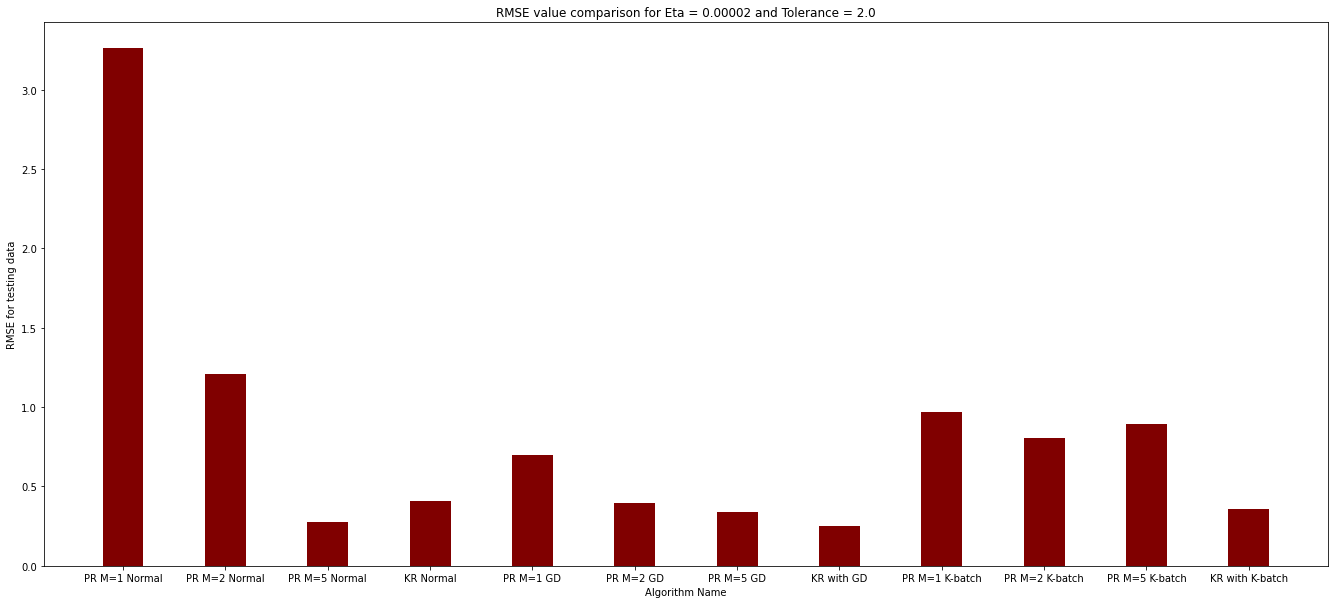

In [53]:
x_axis = ['PR M=1 Normal', 'PR M=2 Normal', 'PR M=5 Normal', 'KR Normal', 'PR M=1 GD', 'PR M=2 GD', 'PR M=5 GD', 'KR with GD', 'PR M=1 K-batch', 'PR M=2 K-batch', 'PR M=5 K-batch', 'KR with K-batch']
y_axis = RMSE_RPR_normal + [test_RMSE_RKR_Q1] + RMSE_RPR + [test_RMSE_RKR_Q2] + RMSE_RPR_K_batch + [test_RMSE_RKR_Q3]

fig2 = plt.figure(figsize = (23,10))

# creating the bar plot
plt.bar(x_axis, y_axis, color ='maroon', width = 0.4)
 
plt.xlabel("Algorithm Name")
plt.ylabel("RMSE for testing data")
plt.title("RMSE value comparison for Eta = 0.00002 and Tolerance = 2.0")
plt.show()

In [71]:
def actual_values(X1, X2):
  PI = math.pi
  Exp = 2 * PI * ((X1**2 + X2**2) ** 0.5)
  actual_Z = np.sin(Exp)
  return actual_Z

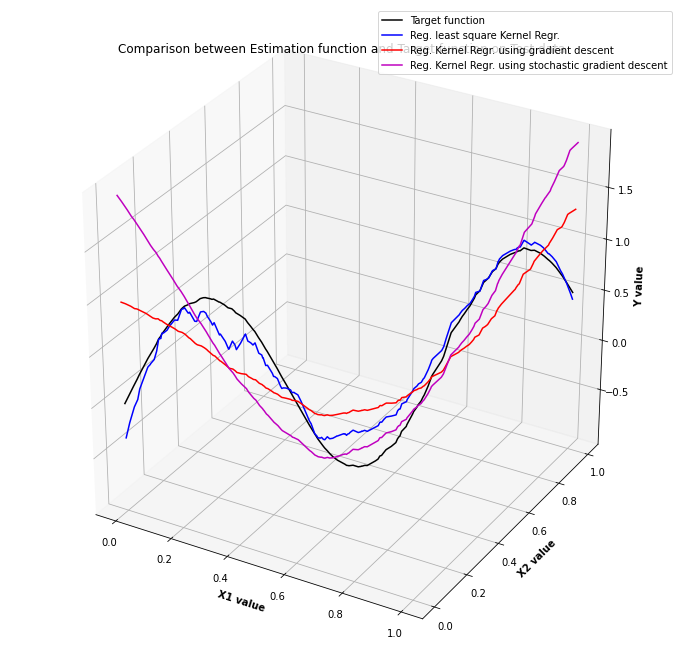

In [75]:
Z = actual_values(test_X1, test_X2)

fig1 = plt.figure(figsize = (12,12))

ax = plt.axes(projection ="3d")
ax.plot(test_X1, test_X2, Z, color = "k", label='Target function')
ax.plot(test_X1, test_X2, test_Y_est, color = "blue", label='Reg. least square Kernel Regr.')
ax.plot(test_X1, test_X2, test_Y_est_Q2, color = "r", label='Reg. Kernel Regr. using gradient descent')
ax.plot(test_X1, test_X2, test_Y_est_Q3, color = "m", label='Reg. Kernel Regr. using stochastic gradient descent');

plt.title("Comparison between Estimation function and Target function on Test data")
ax.set_xlabel('X1 value', fontweight ='bold')
ax.set_ylabel('X2 value', fontweight ='bold')
ax.set_zlabel('Y value', fontweight ='bold')
ax.legend()
plt.show()

# Question-5

Study the behavior of the chosen step length eta regarding the
convergence to actual solution in case of all used algorithms.

## For eta = 0.00002

In [ ]:

M_list = np.array([1,2,5])
values_in_eq = (M_list+1) * (M_list+2)/2
RMSE_RPR = []
iterations = []

lamb = math.exp(-18)
eta = 0.00002
tolerance = 2.0

for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  weight_coeff = np.array([1]*len(x_matrix_bivariate[0]))
  
  counter = 1
  G_norm = []

  G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

  while np.linalg.norm(G) > tolerance:
    weight_coeff = weight_coeff - eta * G
    G_norm.append(np.linalg.norm(G))
    G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

    print('Iteration no : '+str(counter))
    counter = counter+1
    print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
    print('==============================================================')

  test_Y_est_RPR = x_matrix_bivariate_test @ weight_coeff
  RMSE_current_M = calculate_RMSE(test_Y_est_RPR, test_Y)

  print('Testing RMSE for M={} is : {}'.format(M, RMSE_current_M))
  print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
  print('============================================================================')

  RMSE_RPR.append(RMSE_current_M)
  iterations.append(counter-1)

In [55]:
print('Testing RMSE values for M = 1,2 and 5 are respectively : {}'.format(RMSE_RPR))
print('Iterations taken for M = 1,2 and 5 are respectively : {}'.format(iterations))

Testing RMSE values for M = 1,2 and 5 are respectively : [0.6988961589749403, 0.3949235200352556, 0.3362408908496466]
Iterations taken for M = 1,2 and 5 are respectively : [48055, 40376, 65320]


## For eta = 0.0002

In [ ]:

M_list = np.array([1,2,5])
values_in_eq = (M_list+1) * (M_list+2)/2
RMSE_RPR = []
iterations = []

lamb = math.exp(-18)
eta = 0.0002
tolerance = 2.0

for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  weight_coeff = np.array([1]*len(x_matrix_bivariate[0]))
  
  counter = 1
  G_norm = []

  G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

  while np.linalg.norm(G) > tolerance:
    weight_coeff = weight_coeff - eta * G
    G_norm.append(np.linalg.norm(G))
    G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

    print('Iteration no : '+str(counter))
    counter = counter+1
    print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
    print('==============================================================')

  test_Y_est_RPR = x_matrix_bivariate_test @ weight_coeff
  RMSE_current_M = calculate_RMSE(test_Y_est_RPR, test_Y)

  print('Testing RMSE for M={} is : {}'.format(M, RMSE_current_M))
  print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
  print('============================================================================')

  RMSE_RPR.append(RMSE_current_M)
  iterations.append(counter-1)

In [57]:
print('Testing RMSE values for M = 1,2 and 5 are respectively : {}'.format(RMSE_RPR))
print('Iterations taken for M = 1,2 and 5 are respectively : {}'.format(iterations))

Testing RMSE values for M = 1,2 and 5 are respectively : [0.6989026841176795, 0.39491741386577334, 0.3362403894824575]
Iterations taken for M = 1,2 and 5 are respectively : [4806, 4037, 6532]


## For eta = 0.002

In [ ]:

M_list = np.array([1,2,5])
values_in_eq = (M_list+1) * (M_list+2)/2
RMSE_RPR = []
iterations = []

lamb = math.exp(-18)
eta = 0.002
tolerance = 2.0

for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  weight_coeff = np.array([1]*len(x_matrix_bivariate[0]))
  
  counter = 1
  G_norm = []

  G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

  while np.linalg.norm(G) > tolerance:
    weight_coeff = weight_coeff - eta * G
    G_norm.append(np.linalg.norm(G))
    G = compute_gradient(lamb, weight_coeff, x_matrix_bivariate, train_Y)

    print('Iteration no : '+str(counter))
    counter = counter+1
    print('Current gradient\'s norm value is : '+str(np.linalg.norm(G)))
    print('==============================================================')

  test_Y_est_RPR = x_matrix_bivariate_test @ weight_coeff
  RMSE_current_M = calculate_RMSE(test_Y_est_RPR, test_Y)

  print('Testing RMSE for M={} is : {}'.format(M, RMSE_current_M))
  print('Total number of iterations performed to get the values less then the tolerance are : '+str(counter-1))
  print('============================================================================')

  RMSE_RPR.append(RMSE_current_M)
  iterations.append(counter-1)

In [59]:
print('Testing RMSE values for M = 1,2 and 5 are respectively : {}'.format(RMSE_RPR))
print('Iterations taken for M = 1,2 and 5 are respectively : {}'.format(iterations))

Testing RMSE values for M = 1,2 and 5 are respectively : [0.6989554462813905, 0.39486050593360966, nan]
Iterations taken for M = 1,2 and 5 are respectively : [481, 403, 1139]


# Thank You!

In [78]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('PRML03.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/PRML03.ipynb to pdf
[NbConvertApp] Support files will be in PRML03_files/
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Making directory ./PRML03_files
[NbConvertApp] Writing 122053 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[Nb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'